In [4]:
import numpy as np
from scipy.stats import argus

In [6]:
vals = argus(chi=.5).rvs(size=1000)

h = np.histogram(vals)
print(h)   # 1st list in tuple is the counts, 2nd list is the bins (to sum histograms, they need to have same binning and you sum over the counts## Transformation)

(array([ 21,  51,  69,  92, 113, 124, 132, 174, 139,  85]), array([0.03134828, 0.12801683, 0.22468537, 0.32135392, 0.41802247,
       0.51469102, 0.61135957, 0.70802812, 0.80469666, 0.90136521,
       0.99803376]))


## Filling

In [7]:
xyz = np.random.multivariate_normal(mean=[1, 3, 7], cov=np.eye(3), size=10000)

xbins = np.linspace(-10, 10, 20)
ybins = np.linspace(-10, 10, 20)
zbins = np.linspace(-10, 10, 20)
hnumpy = np.histogramdd(xyz, bins=(xbins, ybins, zbins))

In [138]:
import hist

h = hist.Hist(
    hist.axis.StrCategory(["pass", "fail"], name="cat"),
    hist.axis.Regular(10, 0, 10, name="x"),
    hist.axis.Regular(10, 0, 10, name="y"),
    hist.axis.Regular(10, 0, 10, name="z"),
    
    hist.storage.Weight(),
)
h

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='x', label='x'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(10, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [139]:
h.fill(cat="pass", x=xyz[:,0], y=xyz[:,1], z=xyz[:,2])

# suppose we have another sample of xyz values
xyz_sample2 = np.random.multivariate_normal(mean=[1, 3, 7], cov=np.eye(3), size=10000)

# additionally, lets assume entries in sample 2 have some non-uniform weight equal to atan(distance from origin)
weight = np.arctan(np.sqrt(np.power(xyz_sample2, 2).sum(axis=1)))

# weight is a reserved keyword in Hist, and can be added to any fill() call
h.fill(cat="fail", x=xyz_sample2[:,0], y=xyz_sample2[:,1], z=xyz_sample2[:,2], weight=weight)

h

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='x', label='x'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(10, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=20429.5, variance=25748.7) (WeightedSum(value=24412, variance=30773.6) with flow)

In [226]:
h.axes[0]

StrCategory(['pass', 'fail'], name='cat', label='cat')

In [140]:
# create and fill 1D-histogram in one line
hist.Hist.new.Reg(10, 0, 1).Double().fill([1.5, 3, np.nan, -1])

Hist(Regular(10, 0, 1, label='Axis 0'), storage=Double()) # Sum: 0.0 (4.0 with flow)

In [141]:
# underflow/overflow
hist.Hist.new.Reg(10, 0, 1).Double().fill([1.5, 3, np.nan, -1]).view()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [142]:
# underflow/overflow
hist.Hist.new.Reg(10, 0, 1).Double().fill([1.5, 3, np.nan, -1]).view(flow=True)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.])

## Transformation

In [180]:
# project over 1 axis
h.project("z")

Hist(Regular(10, 0, 10, name='z', label='z'), storage=Weight()) # Sum: WeightedSum(value=24379.8, variance=30730.8) (WeightedSum(value=24412, variance=30773.6) with flow)

In [181]:
# project over 2 axes
h.project("z", "x")

Hist(
  Regular(10, 0, 10, name='z', label='z'),
  Regular(10, 0, 10, name='x', label='x'),
  storage=Weight()) # Sum: WeightedSum(value=20448.8, variance=25774.3) (WeightedSum(value=24412, variance=30773.6) with flow)

In [182]:
# sum all x bins, including overflow
h[:, ::sum, :, :]

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(10, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=24356.6, variance=30700) (WeightedSum(value=24412, variance=30773.6) with flow)

In [144]:
# sum all x bins within nominal range [0, 10)
h[:, hist.loc(0.0):hist.loc(10.0):sum, :, :]

# better syntax if you can't remember the order of the axes, you can call an axis by name
h[{"x": slice(hist.loc(0.0), hist.loc(10.), sum)}]

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(10, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=20429.5, variance=25748.7) (WeightedSum(value=20474.6, variance=25808.6) with flow)

In [145]:
# take the first 5 bins in each dimension for the pass catgory
h["pass", :5, :5, :5]

Hist(
  Regular(5, 0, 5, name='x', label='x'),
  Regular(5, 0, 5, name='y', label='y'),
  Regular(5, 0, 5, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=180, variance=180) (WeightedSum(value=10000, variance=10000) with flow)

In [146]:
# rebin z axis by merging every other bin
h[..., ::hist.rebin(2)]

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='x', label='x'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(5, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=20429.5, variance=25748.7) (WeightedSum(value=24412, variance=30773.6) with flow)

In [217]:
# scale entire histogram by 3
h * 3

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='x', label='x'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(10, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=61288.4, variance=231738) (WeightedSum(value=73236.1, variance=276962) with flow)

In [216]:
# scale pass/fail bins in "cat" and first 3 bins in "x" differently
hscaled = h.copy()
hscaled.view()[0, :, :, :] *= 3.0
hscaled.view()[1, :, :, :] *= 4.0
hscaled.view()[:, :3, :, :] *= 5.0
hscaled

Hist(
  StrCategory(['pass', 'fail'], name='cat', label='cat'),
  Regular(10, 0, 10, name='x', label='x'),
  Regular(10, 0, 10, name='y', label='y'),
  Regular(10, 0, 10, name='z', label='z'),
  storage=Weight()) # Sum: WeightedSum(value=358710, variance=8.60044e+06) (WeightedSum(value=362693, variance=8.60546e+06) with flow)

## Save histogram as a root file

In [170]:
# data can be exported to ROOT via uproot3, but only 1D
# uproot4 support for writing is in progress
import uproot3
import os
import matplotlib.pyplot as plt

if os.path.exists("output.root"):
    os.remove("output.root")

outputfile = uproot3.create("output.root")
for cat in h.axes[0]:
    # Integrate out x and y components, just write z histo
    outputfile[cat] = h[cat, ::sum, ::sum, :].to_numpy()
outputfile.close()

# open the file via uproot4
import uproot

uproot.open("output.root").classnames()

{'pass;1': 'TH1D', 'fail;1': 'TH1D'}

## Plotting

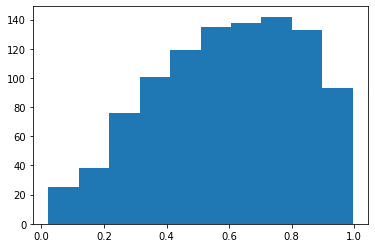

In [183]:
import matplotlib.pyplot as plt
vals = argus(chi=.5).rvs(size=1000)

# notice the semicolon, which prevents display of the return values
plt.hist(vals);

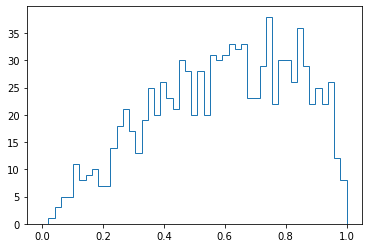

In [189]:
binning = np.linspace(0, 1, 50)

h1 = np.histogram(vals, bins=binning)
plt.stairs(*h1);

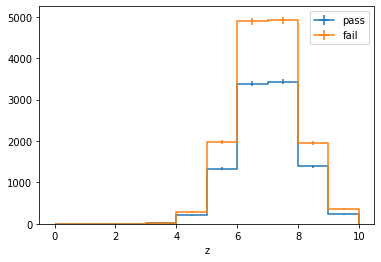

In [197]:
# plot z projection per category
h.project("cat", "z").plot1d()
plt.gca().legend();

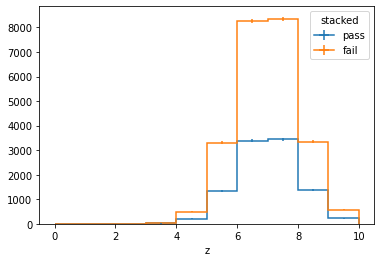

In [198]:
# plot z projection per category, stacked
h[:, ::sum, ::sum, :].plot1d(stack=True)
plt.gca().legend(title="stacked");

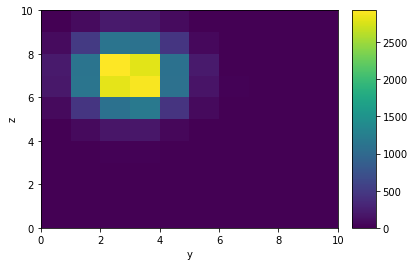

In [199]:
# plot y-z plane projection
h.project("y", "z").plot2d();

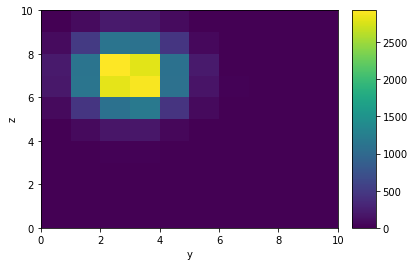

In [205]:
# or using mplhep
import mplhep

mplhep.hist2dplot(h.project("y", "z"));

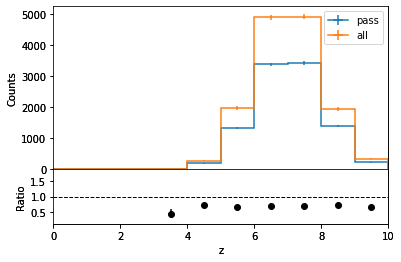

In [203]:
# plot pass vs fail as a function of z (the 2 following lanes are the same thing)

# h.project("cat", "z")[{"cat":"pass"}]
# h["pass", ::sum, ::sum, :]
h["pass", ::sum, ::sum, :].plot_ratio(h["fail", ::sum, ::sum, :], rp_num_label="pass", rp_denom_label="all");